### Trabalho 1 - Variáveis Aleatórias e Processos Estocásticos

##### Importar e Instalar bibliotecas

In [147]:
%pip install matplotlib
%pip install soundfile
%pip install sounddevice
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [148]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import sounddevice as sd
from scipy.stats import skew, kurtosis

##### Carregar o sinal de áudio

In [149]:
signal, sampling_rate = sf.read('botao.wav')

# Reproduzir o áudio
sd.play(signal, sampling_rate)

# Criando um vetor de tempo para o sinal
time = np.arange(len(signal)) / sampling_rate

##### Plot do sinal áudio 

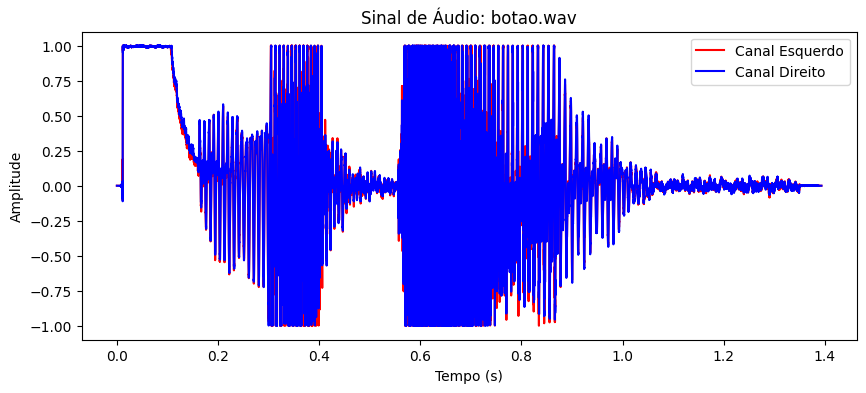

In [150]:
plt.figure(figsize=(10, 4))
plt.plot(time, signal[:, 0], color='r', label='Canal Esquerdo')
plt.plot(time, signal[:, 1], color='b', label='Canal Direito')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal de Áudio: botao.wav')
plt.legend()
plt.show()

##### Gerar o histograma

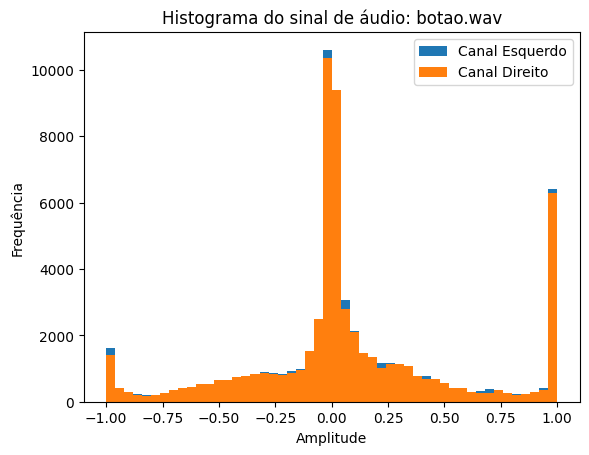

In [151]:
plt.hist(signal[:, 0], bins=50, label='Canal Esquerdo')
plt.hist(signal[:, 1], bins=50, label='Canal Direito')
plt.xlabel('Amplitude')
plt.ylabel('Frequência')
plt.title('Histograma do sinal de áudio: botao.wav')
plt.legend()
plt.show()


##### Calcular a assimetria e a curtose do sinal de áudio

In [152]:
# Calcular a skewness
signal_skewness = skew(signal)

# Calcular a kurtosis
signal_kurtosis = kurtosis(signal)

# imprimir os valores de skewness e kurtosis
print("Assimetria:", signal_skewness)
print("Curtose:", signal_kurtosis)

'''
  Os valores de assimetria para o sinal de áudio são [0.23476657, 0.25803828]. Ambos os valores (canais estéreos)
  são positivos. Como esperado, confirma uma leve assimetria à direita na distribuição das amplitudes 
  do sinal de áudio, como é possível observar no gráfico de histograma.
  
  Já os valores de curtose para o sinal de áudio são [0.38622304 0.3599864].
  Ambos os valores são positivos, o que sugere uma curtose ligeiramente alta, 
  indicando uma distribuição com caudas um pouco mais pesadas do que a distribuição normal.
  É possível observar isso no gráfico de histograma, onde a distribuição das amplitudes do sinal de áudio
  é mais concentrada em torno da média, o que torna as caudas um pouco mais pesadas do que a distribuição normal.
'''

Assimetria: [0.23476657 0.25803828]
Curtose: [0.38622304 0.3599864 ]


'\n  Os valores de assimetria para o sinal de áudio são [0.23476657, 0.25803828]. Ambos os valores (canais estéreos)\n  são positivos. Como esperado, confirma uma leve assimetria à direita na distribuição das amplitudes \n  do sinal de áudio, como é possível observar no gráfico de histograma.\n  \n  Já os valores de curtose para o sinal de áudio são [0.38622304 0.3599864].\n  Ambos os valores são positivos, o que sugere uma curtose ligeiramente alta, \n  indicando uma distribuição com caudas um pouco mais pesadas do que a distribuição normal.\n  É possível observar isso no gráfico de histograma, onde a distribuição das amplitudes do sinal de áudio\n  é mais concentrada em torno da média, o que torna as caudas um pouco mais pesadas do que a distribuição normal.\n'

##### Calcular a média temporal das partes do sinal (10 partes)

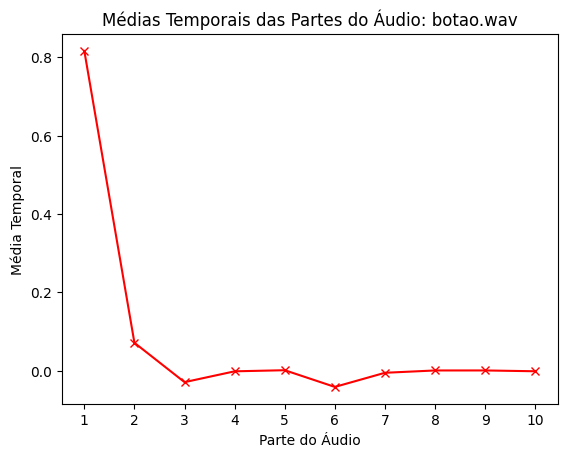

"\nA média temporal das partes do sinal não permanecem constantes. O que é esperado,\numa vez que é possível observar que o sinal sofre variações ao longo do tempo provenientes\nda entonação e pronúcia da palavra 'botão' falada no sinal de áudio.\n"

In [153]:
# Calcular o tamanho de cada parte que o sinal será dividido
part_size = len(signal) // 10

# Dividir o sinal nas 10 partes
signal_parts = [signal[i:i+part_size] for i in range(0, len(signal), part_size)]

# Calcular a média temporal de cada parte
mean_parts = [np.mean(part) for part in signal_parts]

# Plotar as médias temporais em um gráfico de linha
plt.plot(range(1,11),mean_parts, marker='x', color='r')
plt.xlabel('Parte do Áudio')
plt.ylabel('Média Temporal')
plt.title('Médias Temporais das Partes do Áudio: botao.wav')
# Definir os rótulos do eixo x
plt.xticks(range(1, 11))
plt.show()

'''
A média temporal das partes do sinal não permanecem constantes. O que é esperado,
uma vez que é possível observar que o sinal sofre variações ao longo do tempo provenientes
da entonação e pronúcia da palavra 'botão' falada no sinal de áudio.
'''


##### Calcular a função de autocorrelação das partes do sinal

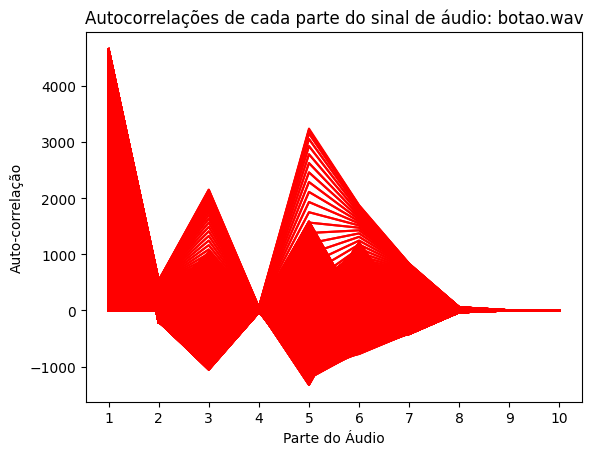

In [154]:
autocorrelations = []
lags = 20

for part in signal_parts:
    autocorr_part = np.correlate(part[:, 0], np.roll(part[:, 0], lags), mode='full')
    autocorrelations.append(autocorr_part)


# Plotar as autocorrelações de cada parte do sinal
plt.plot(range(1,11), autocorrelations, color='r')
plt.xlabel('Parte do Áudio')
plt.ylabel('Auto-correlação')
plt.title('Autocorrelações de cada parte do sinal de áudio: botao.wav')
# Definir os rótulos do eixo x
plt.xticks(range(1, 11))
plt.show()